In [ ]:
# dummy is equivalent to act-only

In [1]:
import gym
import numpy as np
import os
from offsim4rl.data import OfflineDataset, ProbDistribution
from offsim4rl.evaluators.per_state_rejection import PerStateRejectionSampling
from offsim4rl.agents import spinup
import torch

No protocol specified


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# the dummy observation-to-state mapping that maps every observation to the same state
class DummyEncoder(object):
    def __init__(self):
        pass
    def encode(self, observations):
        return [0 for _ in range(len(observations))]

In [8]:
from offsim4rl.utils.dataset_utils import load_h5_dataset
buffer = load_h5_dataset('../outputs/MyGridNaviCoords-v1_random.h5')

load datafile: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 34.08it/s]


In [9]:
dataset = OfflineDataset(
    observation_space=gym.spaces.Box(low=0, high=1, shape=(2,)),
    action_space=gym.spaces.Discrete(5),
    action_dist_type=ProbDistribution.Discrete,
    observations=buffer['observations'],
    actions=buffer['actions'].astype(int),
    action_distributions=buffer['infos/probs'],
    rewards=buffer['rewards'],
    next_observations=buffer['next_observations'],
    terminals=buffer['terminals'].astype(bool),
    steps=buffer['infos/steps'].astype(int),
)

In [10]:
psrs = PerStateRejectionSampling(
    dataset,
    num_states=50,
    encoder=DummyEncoder(),
)

In [11]:
# true env for online validation
env = gym.make('MyGridNaviCoords-v1', seed=100000)
env.reset_task(np.array([4, 4]))

array([4, 4])

In [12]:
for seed in range(10):
    psrs.reset_sampler(seed=seed)
    spinup.ppo_revealed(
        env_fn=lambda: psrs, steps_per_epoch=5000, epochs=50, seed=seed, 
        logger_kwargs=dict(output_dir=f'./outputs/grid_psrs_dummy/seed={seed}', exp_name='MyGridNaviCoords-v1_ppo'), 
        ac_kwargs=dict(hidden_sizes=[32, 32], activation=torch.nn.ReLU), 
        validate=True, val_kwargs=dict(val_env_fn=lambda: env, val_n_episodes=10))

Logging data to ./outputs/grid_psrs_dummy/seed=0/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "actor_critic":	"MLPActorCritic_Revealed",
    "clip_ratio":	0.2,
    "env_fn":	"<function <lambda> at 0x7f94bc01cdd0>",
    "epochs":	50,
    "exp_name":	"MyGridNaviCoords-v1_ppo",
    "gamma":	0.99,
    "lam":	0.97,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f9419939b90>":	{
            "epoch_dict":	{},
            "exp_name":	"MyGridNaviCoords-v1_ppo",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"./outputs/grid_psrs_dummy/seed=0",
            "output_file":	{
                "<_io.TextIOWrapper name='./outputs/grid_psrs_dummy/seed=0/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs"

[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 169
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 104
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 157
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 39
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 69
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 40
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 198
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 133
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 76
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 118
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 118
[GCRAZGDL2222:1381550] tcp_peer_recv_connect_ack: invalid header type: 150


---------------------------------------
|             Epoch |              32 |
|      AverageEpRet |           -3.89 |
|          StdEpRet |             5.4 |
|          MaxEpRet |               1 |
|          MinEpRet |           -25.8 |
|             EpLen |            49.9 |
|      AverageVVals |           -2.84 |
|          StdVVals |           0.054 |
|          MaxVVals |           -2.72 |
|          MinVVals |           -2.99 |
| TotalEnvInteracts |        1.65e+05 |
|            LossPi |        1.64e-08 |
|             LossV |             7.6 |
|       DeltaLossPi |        -0.00116 |
|        DeltaLossV |        -0.00415 |
|           Entropy |           0.666 |
|                KL |         0.00743 |
|          ClipFrac |          0.0102 |
|          StopIter |              79 |
|  AverageVal_EpRet |          -0.627 |
|      StdVal_EpRet |           0.552 |
|      MaxVal_EpRet |           0.253 |
|      MinVal_EpRet |           -1.61 |
|  AverageVal_EpLen |            17.1 |


Bad pipe message: %s [b"\xad*\x1e\x9c\xa1\xa5\xf2\xfd\x93\xadw\xca\xa8|\xdb\x8a\xbbO \x94\x9b\x9a\x91'\xfcn}i\x82\x02k\x92%E\x10Sm\x91e,%\xdc\x9b\x83n\x14\xa5\xec\xcc\x1fM\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c"]
Bad pipe message: %s [b'@\xbf\x9f\xa7\x83\xb5&\x1e\x86O?\xe2\xaa\x93\x0bY\x1b\x1e\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W']
Bad pipe message: %s [b"\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\

---------------------------------------
|             Epoch |              43 |
|      AverageEpRet |           -4.19 |
|          StdEpRet |            4.55 |
|          MaxEpRet |               1 |
|          MinEpRet |           -17.5 |
|             EpLen |            52.9 |
|      AverageVVals |           -2.91 |
|          StdVVals |          0.0232 |
|          MaxVVals |           -2.87 |
|          MinVVals |              -3 |
| TotalEnvInteracts |         2.2e+05 |
|            LossPi |       -9.16e-09 |
|             LossV |               6 |
|       DeltaLossPi |        -0.00214 |
|        DeltaLossV |          -0.122 |
|           Entropy |            0.49 |
|                KL |         0.00252 |
|          ClipFrac |          0.0272 |
|          StopIter |              79 |
|  AverageVal_EpRet |           -1.97 |
|      StdVal_EpRet |           0.835 |
|      MaxVal_EpRet |          -0.444 |
|      MinVal_EpRet |              -3 |
|  AverageVal_EpLen |            32.8 |


In [13]:
dfs = [pd.read_csv(f'./outputs/grid_psrs_dummy/seed={seed}/progress.txt', sep='\t') for seed in range(10)]

In [15]:
df = pd.read_csv('./outputs/grid_psrs_dummy/seed=0/progress.txt', sep='\t')

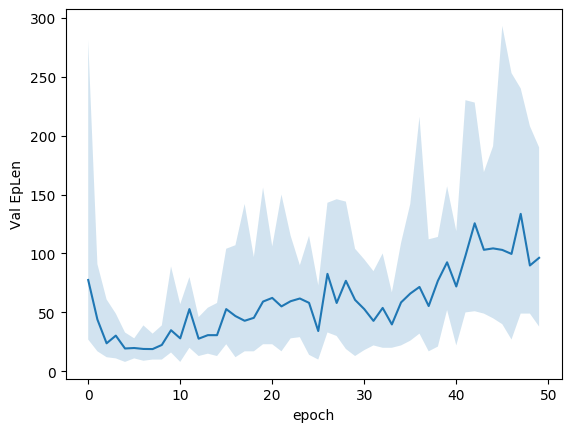

In [16]:
plt.plot(df['AverageVal_EpLen'])
plt.fill_between(df['Epoch'], df['MinVal_EpLen'], df['MaxVal_EpLen'], alpha=0.2)
plt.xlabel('epoch')
plt.ylabel('Val EpLen')
plt.show()

In [17]:
dfs_ = [pd.read_csv(f'./outputs/grid_true/seed={seed}/progress.txt', sep='\t') for seed in range(10)]
df_ = pd.concat(dfs_).groupby('Epoch').mean().reset_index()

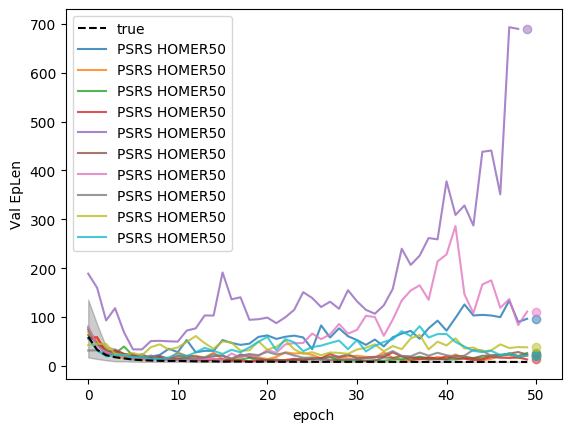

In [18]:
plt.plot(df_['AverageVal_EpLen'], color='k', ls='--', label='true', zorder=10)
plt.fill_between(df_['Epoch'], df_['MinVal_EpLen'], df_['MaxVal_EpLen'], alpha=0.2, color='k')
for df in dfs:
    plt.plot(df['AverageVal_EpLen'], lw=1.5, alpha=0.8, label='PSRS HOMER50')
    plt.scatter(len(df['AverageVal_EpLen']), df['AverageVal_EpLen'].iloc[-1], marker='o', color=plt.gca().lines[-1].get_color(), alpha=0.5, zorder=11)
plt.xlabel('epoch')
plt.ylabel('Val EpLen')
plt.legend()
plt.show()

In [19]:
from spinup.utils.test_policy import load_policy_and_env, run_policy
_, get_action = load_policy_and_env(f'./outputs/grid_psrs_dummy/seed={1}')
run_policy(env, lambda x: int(get_action(x).sample()), render=False, num_episodes=10)



Loading from ./outputs/grid_psrs_dummy/seed=1/pyt_save/model.pt.


Logging data to /tmp/experiments/1661294699/progress.txt
Episode 0 	 EpRet 0.300 	 EpLen 8
Episode 1 	 EpRet -0.200 	 EpLen 13
Episode 2 	 EpRet -3.400 	 EpLen 45
Episode 3 	 EpRet 0.000 	 EpLen 11
Episode 4 	 EpRet -0.100 	 EpLen 12
Episode 5 	 EpRet -0.500 	 EpLen 16
Episode 6 	 EpRet -0.600 	 EpLen 17
Episode 7 	 EpRet 0.300 	 EpLen 8
Episode 8 	 EpRet -0.800 	 EpLen 19
Episode 9 	 EpRet -0.800 	 EpLen 19
-------------------------------------
|    AverageEpRet |           -0.58 |
|        StdEpRet |            1.02 |
|        MaxEpRet |             0.3 |
|        MinEpRet |            -3.4 |
|           EpLen |            16.8 |
-------------------------------------
